In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from pandas import DataFrame 
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture 
from sklearn.metrics import silhouette_score
from sklearn import metrics

In [2]:
# import the encoded data feature
data_encoded_scaled = pd.read_csv("data_encoded_scaled.csv")
data_encoded_scaled.shape
data_encoded_scaled.head()

,0,1
0,1.518483,0.328043
1,1.398809,-0.524158
2,-0.107094,5.015151
3,-0.196850,-0.098058
4,-0.954787,-0.524158


In [3]:
data_merge_labels = pd.read_csv("data_to_merge_labels.csv")
data_merge_labels.shape
data_merge_labels.head()

,consumer_id,occupation,gender,age_group,recency,frequency,quantity,cat_Cleaning Supplies,cat_Drink,cat_Facecream,cat_Facewash,cat_Shampoo,cat_Skincare,cat_Soap,cat_Toiletry
0,1300016905,Service Holder,Male,18 To 35,85.00,6,6,2,0,0,0,1,1,2,0
1,1300019918,Housewife,Female,35+,82.00,2,2,0,1,0,0,0,0,0,1
2,1300028530,Student,Male,18 To 35,44.25,28,31,8,3,0,0,2,6,6,3
3,1300028697,Business,Male,35+,42.00,4,4,1,0,0,0,0,1,2,0
4,1300032742,Business,Male,18 To 35,23.00,2,2,1,0,0,0,0,0,1,0


# Gaussian Mixture Model


In [4]:
# Make a copy of the encoded data 
scaled_df = data_encoded_scaled.copy()
scaled_df.head()

,0,1
0,1.518483,0.328043
1,1.398809,-0.524158
2,-0.107094,5.015151
3,-0.196850,-0.098058
4,-0.954787,-0.524158


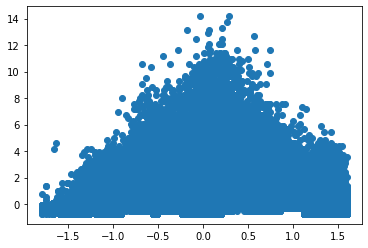

In [5]:
#Plot the new DataFrame

plt.scatter(scaled_df.iloc[:,0], scaled_df.iloc[:,1])
plt.show()

In [6]:
%%time
#Fit the Gaussian Mixture Model with 3 clusters

gmm = GaussianMixture(n_components = 3, covariance_type='full') 
gmm.fit(
)

CPU times: user 5.31 s, sys: 1.36 s, total: 6.67 s
Wall time: 932 ms


GaussianMixture(n_components=3)

In [7]:
labels = gmm.predict(scaled_df)
labels

array([1, 1, 2, ..., 0, 1, 2])

In [8]:
results = pd.DataFrame(data_merge_labels.copy())
results.insert(1, 'cluster', labels)
results["number_consumers"] = 1
print(results.info())
results.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374479 entries, 0 to 374478
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   consumer_id            374479 non-null  int64  
 1   cluster                374479 non-null  int64  
 2   occupation             374479 non-null  object 
 3   gender                 374479 non-null  object 
 4   age_group              374479 non-null  object 
 5   recency                374479 non-null  float64
 6   frequency              374479 non-null  int64  
 7   quantity               374479 non-null  int64  
 8   cat_Cleaning Supplies  374479 non-null  int64  
 9   cat_Drink              374479 non-null  int64  
 10  cat_Facecream          374479 non-null  int64  
 11  cat_Facewash           374479 non-null  int64  
 12  cat_Shampoo            374479 non-null  int64  
 13  cat_Skincare           374479 non-null  int64  
 14  cat_Soap               374479 non-nu

,consumer_id,cluster,occupation,gender,age_group,recency,frequency,quantity,cat_Cleaning Supplies,cat_Drink,cat_Facecream,cat_Facewash,cat_Shampoo,cat_Skincare,cat_Soap,cat_Toiletry,number_consumers
0,1300016905,1,Service Holder,Male,18 To 35,85.00,6,6,2,0,0,0,1,1,2,0,1
1,1300019918,1,Housewife,Female,35+,82.00,2,2,0,1,0,0,0,0,0,1,1
2,1300028530,2,Student,Male,18 To 35,44.25,28,31,8,3,0,0,2,6,6,3,1
3,1300028697,0,Business,Male,35+,42.00,4,4,1,0,0,0,0,1,2,0,1
4,1300032742,0,Business,Male,18 To 35,23.00,2,2,1,0,0,0,0,0,1,0,1


Text(0.5, 1.0, 'Cluster distribution')

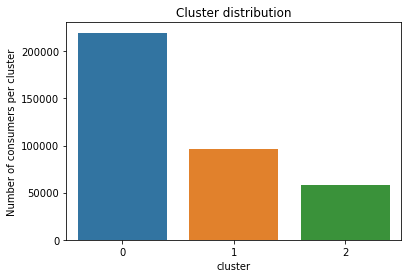

In [9]:
ax = sns.countplot(x='cluster', data=results)
ax.set_ylabel("Number of consumers per cluster")
plt.title("Cluster distribution")

In [10]:
# Number of customers in each cluster
round(results.cluster.value_counts(), 2)

0    219645
1     96201
2     58633
Name: cluster, dtype: int64

In [11]:
# Weight percentage of each cluster
round(results.cluster.value_counts(normalize=True), 2)

0    0.59
1    0.26
2    0.16
Name: cluster, dtype: float64

<AxesSubplot:xlabel='frequency', ylabel='recency'>

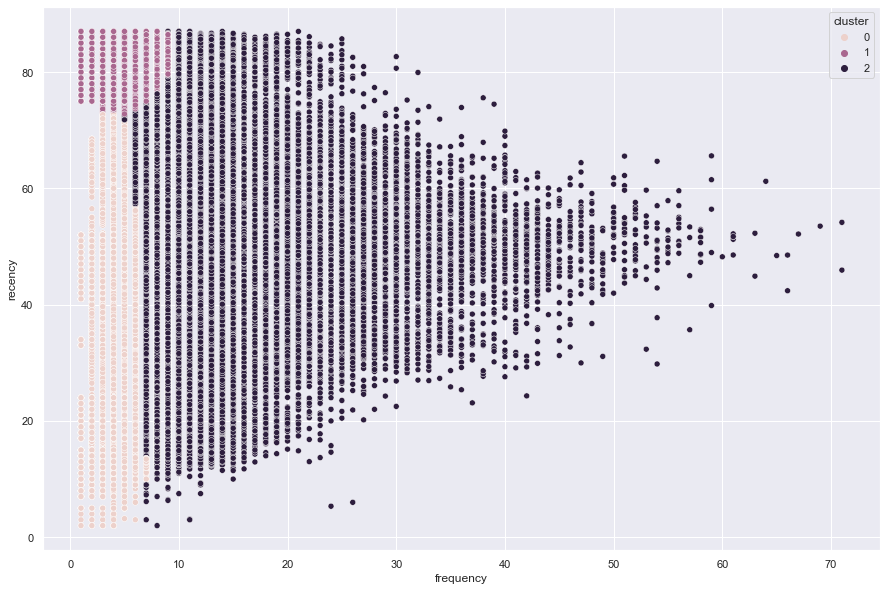

In [12]:
# Let's visualize the clusters
plt.figure(figsize = (15,10))
sns.set_theme()
sns.scatterplot(x="frequency", y='recency', data=results, hue="cluster")

In [24]:
# Analysis for n=5 clusters

#Dimension Reduction & De-correleation (PCA)

pca = PCA(n_components = 2) 
trn_df = pca.fit_transform(scaled_df) 
trn_df = pd.DataFrame(trn_df) 
trn_df.columns = ['P1', 'P2'] 

In [14]:
trn_df.head()

,P1,P2
0,1.305691,-0.841768
1,0.618471,-1.359743
2,3.470520,3.621974
3,-0.208531,0.069856
4,-1.045772,0.304501


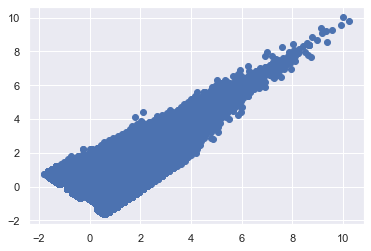

In [15]:
#Plot the transformed Dataset

plt.scatter(trn_df.iloc[:,0], trn_df.iloc[:,1])
plt.show()

In [16]:
%%time
#Fit the Gaussian Mixture Model with 5 clusters

gmm = GaussianMixture(n_components = 5, covariance_type='full') 
gmm.fit(trn_df)

CPU times: user 6.74 s, sys: 1.84 s, total: 8.58 s
Wall time: 1.22 s


GaussianMixture(n_components=5)

In [17]:
%%time
# Predict Cluster
labels = gmm.predict(trn_df)


CPU times: user 224 ms, sys: 91.9 ms, total: 316 ms
Wall time: 64.4 ms


In [18]:
#Join labels to transformed dataset

gmm_results= pd.DataFrame(trn_df.copy())
gmm_results.insert(2,'cluster',labels)


In [19]:
print(gmm_results.head())


         P1        P2  cluster
0  1.305691 -0.841768        0
1  0.618471 -1.359743        0
2  3.470520  3.621974        4
3 -0.208531  0.069856        3
4 -1.045772  0.304501        1


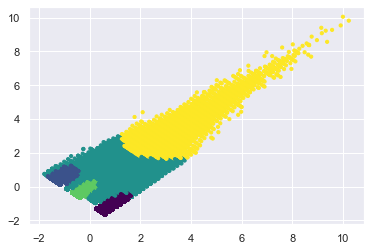

In [20]:
#Plot dataset with clusters

recency= gmm_results.iloc[:,0]
frequency=gmm_results.iloc[:,1]
plt.scatter(recency, frequency, c=labels, s=10, cmap='viridis');
plt.show()

In [21]:
#Probabilistic Cluster Arrangement

probs = gmm.predict_proba(trn_df)
print(probs[:5].round(3))

[[0.97  0.    0.03  0.    0.   ]
 [0.999 0.    0.001 0.    0.   ]
 [0.    0.    0.    0.    1.   ]
 [0.    0.    0.095 0.902 0.004]
 [0.    0.982 0.018 0.    0.   ]]


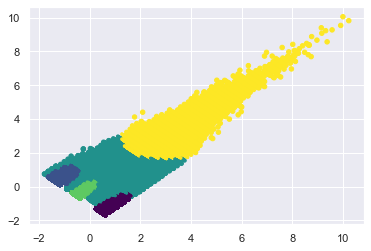

In [22]:
# Visulaize the probabilistic cluster

size = 20 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(recency, frequency, c=labels, cmap='viridis', s=size);

plt.show()

In [23]:
#AIC Test for determining number of componenets

%%time
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(trn_df)
          for n in n_components]

plt.plot(n_components, [m.bic(trn_df) for m in models], label='BIC')
plt.plot(n_components, [m.aic(trn_df) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

UsageError: Line magic function `%%time` not found.


In [ ]:
# Join label to our original data

results = pd.DataFrame(data_aggregated.copy())
results.insert(7, 'cluster', labels)
results["number_consumers"] = 1
print(results.info())
results.head()


In [ ]:
ax = sns.countplot(x='cluster', data=results)
ax.set_ylabel("Number of consumers per cluster")
plt.title("Cluster distribution")

In [ ]:
# Number of customers in each cluster

round(results.cluster.value_counts(), 2)

In [ ]:
# Weight percentage of each cluster

round(results.cluster.value_counts(normalize=True), 2)

## Cluster Analysis

In [ ]:
# Summarize each clusters attributes

products_cat = ['cat_Cleaning Supplies', 'cat_Drink', 'cat_Facecream','cat_Facewash',\
                  'cat_Shampoo','cat_Skincare','cat_Soap','cat_Toiletry']

cluster_behavior_sum = results.groupby(['cluster'], as_index=False).agg({
    'number_consumers': 'sum',
    'recency':'mean',
    'frequency':'mean',
    'cat_Cleaning Supplies':'mean',
    'cat_Drink': 'mean', 
    'cat_Facecream': 'mean' ,
    'cat_Facewash': 'mean',
    'cat_Shampoo': 'mean',
    'cat_Skincare' : 'mean',
    'cat_Soap': 'mean',
    'cat_Toiletry':'mean'
})
round(cluster_behavior_sum, 2)

In [ ]:
plt.figure(figsize=(15, 7)) 
sns.heatmap(cluster_behavior_sum [products_cat], cmap =sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
, linewidths = 0.30, annot = True)

Cluster 0 : represents 30% of the consumers; low recency and low frequence of purchases;
favorites products(Cat_Soap > Cat_Cleaning Supplies > cat_Skincare )

Cluster 1 : represents 25% of the consumers; high recency and low frequence of purchases;
favorites products : cat_Soap > cat_Cleaning Supplies > cat_Toiletry

Cluster 2 : represents 25% of the consumers; low recency and high frequence of purchases;
favorites products : cat_Soap > cat_Cleaning Supplies > cat_Skincare > cat_Toiletry > cat_Drink >cCat_Shampoo

Cluster 3 : represents 17% of the consumers; low recency and low frequence of purchases;
favorites products: Cat_Soap > Cat_Cleaning Supplies > cat_Toiletry )

Cluster 4 : represents 03% of the consumers; Low recency and low frequence of purchases;
favorites products : cat_Soap > cat_Cleaning Supplies > cat_Toiletry > cat_skincare


In [ ]:
# Let's focus on the recency, frequency and quantity for each cluster 
cluster_behavior = results.groupby(['cluster'], as_index=False).agg({
    'number_consumers':'sum',
    'recency':'mean',
    'frequency':'mean',
    'quantity': 'mean'    
})
round(cluster_behavior, 2)

We can analyse how each cluster differ from other by observing their mean values in the recency and the frequency attributes

In [ ]:
# Gender analaysis
behavior_gender = results.groupby(['gender','cluster'], as_index=False).agg({
    'number_consumers': 'sum',
    'recency':'mean',
    'frequency':'sum',
    'cat_Cleaning Supplies':'sum',
    'cat_Drink': 'sum', 
    'cat_Facecream': 'sum' ,
    'cat_Facewash': 'sum',
    'cat_Shampoo': 'sum',
    'cat_Skincare' : 'sum',
    'cat_Soap': 'sum',
    'cat_Toiletry':'sum'
})

related_to_frequency = ['frequency','cat_Cleaning Supplies', 'cat_Drink',\
'cat_Facecream','cat_Facewash','cat_Shampoo','cat_Skincare','cat_Soap','cat_Toiletry'] 
# Define the column to transform in percentage

behavior_gender[related_to_frequency] = round(behavior_gender[related_to_frequency]*100\
                                              /behavior_gender['frequency'].sum(),1) 
# Compute to show the values in percentage

behavior_gender.sort_values('frequency', ascending=False) # Sort values by frequency

In [ ]:
# Age group analysis
behavior_age_group = results.groupby(['age_group'], as_index=False).agg({
    'number_consumers': 'sum',
    'recency':'mean',
    'frequency':'sum',
    'cat_Cleaning Supplies':'sum',
    'cat_Drink': 'sum', 
    'cat_Facecream': 'sum' ,
    'cat_Facewash': 'sum',
    'cat_Shampoo': 'sum',
    'cat_Skincare' : 'sum',
    'cat_Soap': 'sum',
    'cat_Toiletry':'sum'
})

related_to_frequency = ['frequency','cat_Cleaning Supplies', 'cat_Drink',\
'cat_Facecream','cat_Facewash','cat_Shampoo','cat_Skincare','cat_Soap','cat_Toiletry'] 
# Define the column to transform in percentage

behavior_age_group[related_to_frequency] = round(behavior_age_group[related_to_frequency]*100\
                        /behavior_age_group['frequency'].sum(),1) # Compute to show the values in percentage

behavior_age_group.sort_values('frequency', ascending=False) # Sort values by frequency

80% of the purchases is made by the age group 18 To 35

In [ ]:
# Age occupation analysis
behavior_occupation = results.groupby(['occupation'], as_index=False).agg({
    'number_consumers': 'sum',
    'recency':'mean',
    'frequency':'sum',
    'cat_Cleaning Supplies':'sum',
    'cat_Drink': 'sum', 
    'cat_Facecream': 'sum' ,
    'cat_Facewash': 'sum',
    'cat_Shampoo': 'sum',
    'cat_Skincare' : 'sum',
    'cat_Soap': 'sum',
    'cat_Toiletry':'sum'
})

related_to_frequency = ['frequency','cat_Cleaning Supplies', 'cat_Drink',\
'cat_Facecream','cat_Facewash','cat_Shampoo','cat_Skincare','cat_Soap','cat_Toiletry'] 
# Define the column to transform in percentage

behavior_occupation[related_to_frequency] = round(behavior_occupation[related_to_frequency]*100\
                        /behavior_occupation['frequency'].sum(),1) # Compute to show the values in percentage

behavior_occupation.sort_values('frequency', ascending=False) # Sort values by frequency

The Service holder is the occupation that purchased more product. mainly cat_Cleaning Supplies and cat_Soap

## In details Cluster analysis


In [ ]:
# what does largest group look like

results["consumer_id"] = results["consumer_id"].astype('str')
cluster0 = results[results.cluster == 0]
cluster1 = results[results.cluster == 1]
cluster2 = results[results.cluster == 2]
cluster3 = results[results.cluster == 3]
cluster4 = results[results.cluster == 4]


cat_label = ['gender', 'age_group','occupation']
products_label = ['cat_Cleaning Supplies', 'cat_Drink', 'cat_Facecream','cat_Facewash','cat_Shampoo','cat_Skincare','cat_Soap','cat_Toiletry']

In [ ]:
# Let's look at the main characteristics of the cluster 0

cluster_behavior_0 = cluster0.groupby(['gender', 'age_group','occupation'], as_index=False).agg({
    'recency':'sum',
    'frequency':'sum',
    'cat_Cleaning Supplies':'sum',
    'cat_Drink': 'sum', 
    'cat_Facecream': 'sum' ,
    'cat_Facewash': 'sum',
    'cat_Shampoo': 'sum',
    'cat_Skincare' : 'sum',
    'cat_Soap': 'sum',
    'cat_Toiletry':'sum'
})

cat_label = ['cluster','gender', 'age_group','occupation']
products_label = ['cat_Cleaning Supplies', 'cat_Drink', 'cat_Facecream','cat_Facewash','cat_Shampoo','cat_Skincare','cat_Soap','cat_Toiletry']

cluster_behavior_0[products_label] = cluster_behavior_0[products_label]*100/(cluster_behavior_0["frequency"].sum())
round(cluster_behavior_0, 2)

cluster_behavior_0_imp = cluster_behavior_0[(cluster_behavior_0['cat_Cleaning Supplies']>1) | (cluster_behavior_0['cat_Drink']>1) |\
                        (cluster_behavior_0['cat_Facecream']>1) | (cluster_behavior_0['cat_Facewash']>1) |(cluster_behavior_0['cat_Shampoo']>1)|\
                        (cluster_behavior_0['cat_Skincare']>1) |(cluster_behavior_0['cat_Soap']>1) |(cluster_behavior_0['cat_Toiletry']>1)]
                                           
cluster_behavior_0_imp = round(cluster_behavior_0_imp,2)
cluster_behavior_0_imp


In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(cluster_behavior_0_imp[products_label], cmap =sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
, linewidths = 0.30, annot = True)

In [ ]:
# Let's look at the main characteristics of the cluster 1
cluster_behavior_1 = cluster1.groupby(['gender', 'age_group','occupation'], as_index=False).agg({
    'recency':'sum',
    'frequency':'sum',
    'cat_Cleaning Supplies':'sum',
    'cat_Drink': 'sum', 
    'cat_Facecream': 'sum' ,
    'cat_Facewash': 'sum',
    'cat_Shampoo': 'sum',
    'cat_Skincare' : 'sum',
    'cat_Soap': 'sum',
    'cat_Toiletry':'sum'
})

cat_label = ['cluster','gender', 'age_group','occupation']
products_label = ['cat_Cleaning Supplies', 'cat_Drink', 'cat_Facecream','cat_Facewash','cat_Shampoo','cat_Skincare','cat_Soap','cat_Toiletry']

cluster_behavior_1[products_label] = cluster_behavior_1[products_label]*100/(cluster_behavior_1["frequency"].sum())
round(cluster_behavior_1, 2)

cluster_behavior_1_imp =cluster_behavior_1[(cluster_behavior_1['cat_Cleaning Supplies']>1) | (cluster_behavior_1['cat_Drink']>1) |\
                        (cluster_behavior_1['cat_Facecream']>1) | (cluster_behavior_1['cat_Facewash']>1) |(cluster_behavior_1['cat_Shampoo']>1)|\
                        (cluster_behavior_1['cat_Skincare']>1) |(cluster_behavior_1['cat_Soap']>1) |(cluster_behavior_1['cat_Toiletry']>1)]
                                           
cluster_behavior_1_imp = round(cluster_behavior_1_imp,2)
cluster_behavior_1_imp

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(cluster_behavior_1_imp[products_label], cmap =sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
, linewidths = 0.30, annot = True)

In [ ]:
# Let's look at the main characteristics of the cluster 2
cluster_behavior_2 = cluster2.groupby(['gender', 'age_group','occupation'], as_index=False).agg({
    'recency':'sum',
    'frequency':'sum',
    'cat_Cleaning Supplies':'sum',
    'cat_Drink': 'sum', 
    'cat_Facecream': 'sum' ,
    'cat_Facewash': 'sum',
    'cat_Shampoo': 'sum',
    'cat_Skincare' : 'sum',
    'cat_Soap': 'sum',
    'cat_Toiletry':'sum'
})

cat_label = ['cluster','gender', 'age_group','occupation']
products_label = ['cat_Cleaning Supplies', 'cat_Drink', 'cat_Facecream','cat_Facewash','cat_Shampoo','cat_Skincare','cat_Soap','cat_Toiletry']

cluster_behavior_2[products_label] = cluster_behavior_2[products_label]*100/(cluster_behavior_2["frequency"].sum())
round(cluster_behavior_2, 2)

cluster_behavior_2_imp = cluster_behavior_2[(cluster_behavior_2['cat_Cleaning Supplies']>1) | (cluster_behavior_2['cat_Drink']>1) |\
                        (cluster_behavior_2['cat_Facecream']>1) | (cluster_behavior_2['cat_Facewash']>1) |(cluster_behavior_2['cat_Shampoo']>1)|\
                        (cluster_behavior_2['cat_Skincare']>1) |(cluster_behavior_2['cat_Soap']>1) |(cluster_behavior_2['cat_Toiletry']>1)]
                                           
cluster_behavior_2_imp = round(cluster_behavior_2_imp,2)
cluster_behavior_2_imp

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(cluster_behavior_2_imp[products_label], cmap =sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
, linewidths = 0.30, annot = True)

In [ ]:
# Let's look at the main characteristics of the cluster 3

cluster_behavior_3 = cluster3.groupby(['gender', 'age_group','occupation'], as_index=False).agg({
    'recency':'sum',
    'frequency':'sum',
    'cat_Cleaning Supplies':'sum',
    'cat_Drink': 'sum', 
    'cat_Facecream': 'sum' ,
    'cat_Facewash': 'sum',
    'cat_Shampoo': 'sum',
    'cat_Skincare' : 'sum',
    'cat_Soap': 'sum',
    'cat_Toiletry':'sum'
})

cat_label = ['cluster','gender', 'age_group','occupation']
products_label = ['cat_Cleaning Supplies', 'cat_Drink', 'cat_Facecream','cat_Facewash','cat_Shampoo','cat_Skincare','cat_Soap','cat_Toiletry']

cluster_behavior_3[products_label] = cluster_behavior_3[products_label]*100/(cluster_behavior_3["frequency"].sum())
round(cluster_behavior_3, 2)

cluster_behavior_3_imp = cluster_behavior_3[(cluster_behavior_3['cat_Cleaning Supplies']>1) | (cluster_behavior_3['cat_Drink']>1) |\
                        (cluster_behavior_3['cat_Facecream']>1) | (cluster_behavior_3['cat_Facewash']>1) |(cluster_behavior_3['cat_Shampoo']>1)|\
                        (cluster_behavior_3['cat_Skincare']>1) |(cluster_behavior_3['cat_Soap']>1) |(cluster_behavior_3['cat_Toiletry']>1)]
                                           
cluster_behavior_3_imp = round(cluster_behavior_3_imp,2)
cluster_behavior_3_imp

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(cluster_behavior_3_imp[products_label], cmap =sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
, linewidths = 0.30, annot = True)

In [ ]:
# Let's look at the main characteristics of the cluster 4

cluster_behavior_4 = cluster4.groupby(['gender', 'age_group','occupation'], as_index=False).agg({
    'recency':'sum',
    'frequency':'sum',
    'cat_Cleaning Supplies':'sum',
    'cat_Drink': 'sum', 
    'cat_Facecream': 'sum' ,
    'cat_Facewash': 'sum',
    'cat_Shampoo': 'sum',
    'cat_Skincare' : 'sum',
    'cat_Soap': 'sum',
    'cat_Toiletry':'sum'
})

cat_label = ['cluster','gender', 'age_group','occupation']
products_label = ['cat_Cleaning Supplies', 'cat_Drink', 'cat_Facecream','cat_Facewash','cat_Shampoo','cat_Skincare','cat_Soap','cat_Toiletry']

cluster_behavior_4[products_label] = cluster_behavior_4[products_label]*100/(cluster_behavior_4["frequency"].sum())
round(cluster_behavior_4, 2)

cluster_behavior_4_imp = cluster_behavior_4[(cluster_behavior_4['cat_Cleaning Supplies']>1) | (cluster_behavior_4['cat_Drink']>1) |\
                        (cluster_behavior_4['cat_Facecream']>1) | (cluster_behavior_4['cat_Facewash']>1) |(cluster_behavior_4['cat_Shampoo']>1)|\
                        (cluster_behavior_4['cat_Skincare']>1) |(cluster_behavior_4['cat_Soap']>1) |(cluster_behavior_4['cat_Toiletry']>1)]
                                           
cluster_behavior_4_imp = round(cluster_behavior_4_imp,2)
cluster_behavior_4_imp

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(cluster_behavior_4_imp[products_label], cmap =sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
, linewidths = 0.30, annot = True)

In [ ]:
# Let's look at the distribution of the of purchases by clusters in percentage
cluster_behavior2 = results.groupby(['cluster'], as_index=False).agg({
    'frequency':'sum',
    'cat_Cleaning Supplies':'sum',
    'cat_Drink': 'sum', 
    'cat_Facecream': 'sum' ,
    'cat_Facewash': 'sum',
    'cat_Shampoo': 'sum',
    'cat_Skincare' : 'sum',
    'cat_Soap': 'sum',
    'cat_Toiletry':'sum'
})

clust = round(cluster_behavior2*100/cluster_behavior2['frequency'].sum(),1)
clust

-This table shows the repartition of purchases in percentage between clusters and product gategories

In [ ]:
# Let's look at the distribution of purchases by clusters
cluster_behavior2 = results.groupby(['cluster', 'gender'], as_index=False).agg({
    'frequency':'sum',
    'cat_Cleaning Supplies':'sum',
    'cat_Drink': 'sum', 
    'cat_Facecream': 'sum' ,
    'cat_Facewash': 'sum',
    'cat_Shampoo': 'sum',
    'cat_Skincare' : 'sum',
    'cat_Soap': 'sum',
    'cat_Toiletry':'sum'
})

cluster_behavior2[['frequency','cat_Cleaning Supplies','cat_Drink', 'cat_Facecream','cat_Facewash','cat_Shampoo','cat_Skincare','cat_Soap','cat_Toiletry']] = round(cluster_behavior2[['frequency','cat_Cleaning Supplies','cat_Drink', 'cat_Facecream','cat_Facewash','cat_Shampoo','cat_Skincare','cat_Soap','cat_Toiletry']]*100/cluster_behavior2['frequency'].sum(),1)
cluster_behavior2

In [ ]:
# Let's look at the main characteristics of each cluster
cluster_behavior = cluster0.groupby(['cluster','gender', 'age_group','occupation'], as_index=False).agg({
    'recency':'mean',
    'frequency':'mean',
    'cat_Drink': 'sum', 
    'cat_Facecream': 'sum' ,
    'cat_Facewash': 'sum',
    'cat_Shampoo': 'sum',
    'cat_Skincare' : 'sum',
    'cat_Soap': 'sum',
    'cat_Toiletry':'sum'
})

cluster_behavior.head()

In [ ]:
# what does the smallest group look like

results[results.cluster == 1].describe()

In [ ]:
# what does the group 0 look like
results[results.cluster == 0].describe()

In [ ]:
# Let's visualise the distribution difference between each group
# recency plots

clusters = results["cluster"].unique() 

x = 1
plt.figure(figsize=(12, 20))
for x, c in enumerate(clusters):
    ax = plt.subplot(4, 2, x + 1)
    plt.title(f'Cluster {c} Recency')
    sns.violinplot(x=results[results["cluster"] == c].recency);

Visualise the distribution of each cluster by recency

In [ ]:
clusters = results["cluster"].unique() 

x = 1
plt.figure(figsize=(12, 20))
for x, c in enumerate(clusters):
    ax = plt.subplot(4, 2, x + 1)
    plt.title(f'Cluster {c} Frequency')
    sns.violinplot(x=results[results["cluster"] == c].frequency);

Visualise the distribution of each cluster by frequency

In [ ]:
# Let's visualize the clusters
plt.figure(figsize = (15,10))
sns.set_theme()
sns.scatterplot(x="frequency", y='recency', data=results, hue="cluster")